In [1]:
import numpy as np
import sys
sys.path.append('../..')
from utils.workflow import WorkflowModel
from utils.data import RK4DataGenerator, mono_beta
import utils.plotting as plotting
from utils.eval import eval_predictions

2025-12-20 10:46:06.297297: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
Using backend: tensorflow
Other supported backends: tensorflow.compat.v1, pytorch, jax, paddle.
paddle supports more examples now and is recommended.
Enable just-in-time compilation with XLA.



Set the default float type to float64


In [2]:
t0, tf, nop_data = 0, 50, 100
data_t = np.linspace(t0, tf, nop_data)
rkdata = RK4DataGenerator(mono_beta)
sir_comparts = rkdata.generate(data_t)
sir_data = rkdata.generate(data_t, noise_std=0.0)

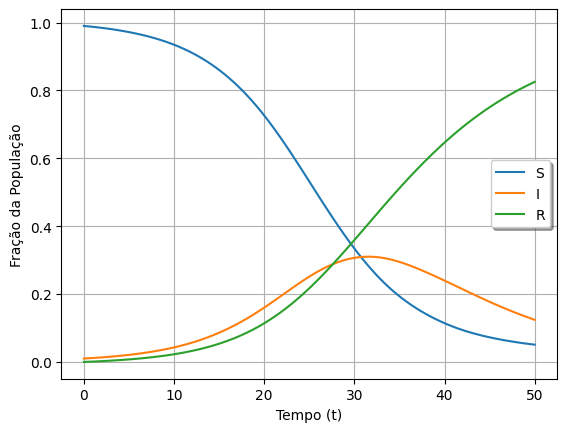

In [3]:
plotting.plot_rk_curves(data_t, sir_data)

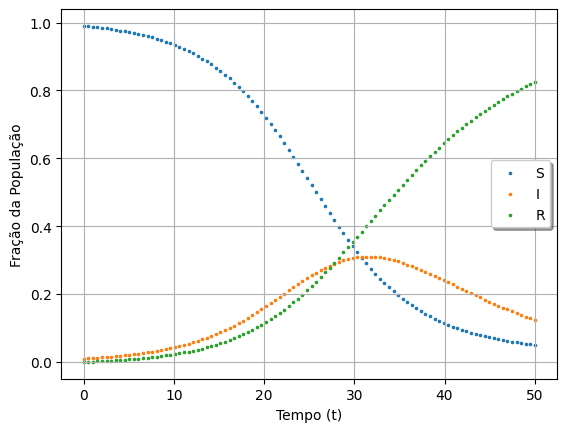

In [4]:
plotting.plot_rk_data(data_t, sir_data)

In [5]:
model = WorkflowModel(t0, tf, sir_data[:,1], data_t, scaling="norm")
model.S0, model.I0, model.R0 

[<deepxde.icbc.initial_conditions.IC object at 0x7fa189f6d850>, <deepxde.icbc.initial_conditions.IC object at 0x7fa189f3d8d0>, <deepxde.icbc.boundary_conditions.PointSetBC object at 0x7fa189f3df10>]
Compiling model...
'compile' took 0.005987 s



2025-12-20 10:46:10.255706: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
I0000 00:00:1766238370.256445  502651 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2581 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5


(np.float64(0.99), np.float64(0.01), 0.0)

In [6]:
model.train()

Training model...



2025-12-20 10:46:11.914963: I external/local_xla/xla/service/service.cc:163] XLA service 0x55e4b84a5d00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-12-20 10:46:11.914981: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2025-12-20 10:46:11.922718: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-12-20 10:46:11.974044: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91002
I0000 00:00:1766238372.254314  502651 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Step      Train loss                                            Test loss                                             Test metric
0         [5.35e-03, 5.17e-04, 9.80e-01, 1.00e-04, 7.15e-02]    [5.37e-03, 5.04e-04, 9.80e-01, 1.00e-04, 7.15e-02]    []  
100       [1.64e-04, 1.27e-04, 1.23e-05, 1.50e-07, 2.63e-03]    [1.40e-04, 1.30e-04, 1.23e-05, 1.50e-07, 2.63e-03]    []  
200       [1.16e-04, 8.73e-05, 1.03e-09, 3.83e-09, 2.14e-03]    [1.05e-04, 8.77e-05, 1.03e-09, 3.83e-09, 2.14e-03]    []  
300       [7.74e-05, 4.80e-05, 2.15e-12, 5.13e-09, 1.56e-03]    [6.83e-05, 4.84e-05, 2.15e-12, 5.13e-09, 1.56e-03]    []  
400       [5.21e-05, 2.69e-05, 2.36e-12, 2.27e-09, 1.00e-03]    [4.48e-05, 2.74e-05, 2.36e-12, 2.27e-09, 1.00e-03]    []  
500       [4.29e-05, 2.20e-05, 2.05e-11, 1.28e-09, 6.51e-04]    [3.66e-05, 2.17e-05, 2.05e-11, 1.28e-09, 6.51e-04]    []  
600       [3.45e-05, 2.07e-05, 1.19e-10, 1.15e-08, 4.37e-04]    [2.92e-05, 1.95e-05, 1.19e-10, 1.15e-08, 4.37e-04]    []  
700      

(<deepxde.model.LossHistory at 0x7fa1941b6110>,
 <deepxde.model.TrainState at 0x7fa19ebd3150>)

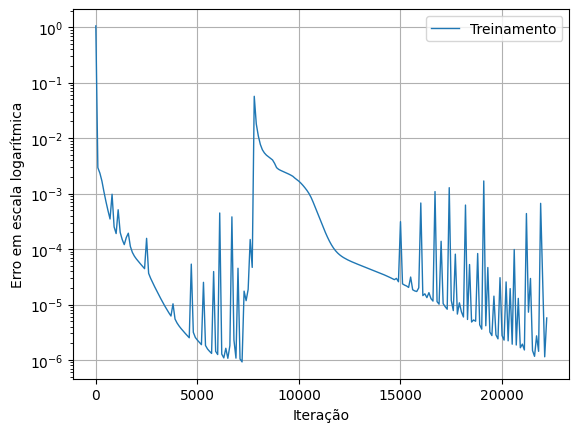

In [7]:
plotting.plot_losshistory(model.losshistory)

In [8]:
predictions = model.predict(data_t)

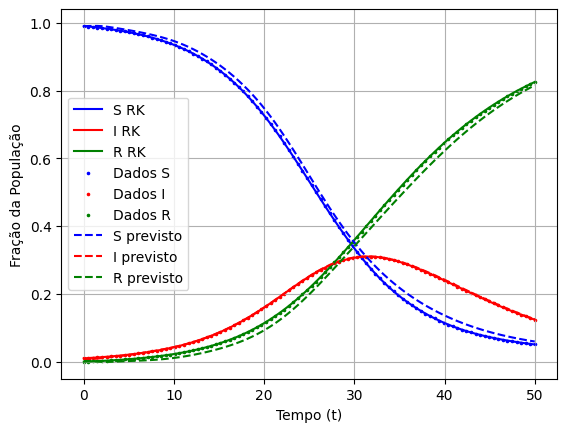

In [9]:
plotting.plot_results(sir_comparts, sir_data, predictions, data_t)

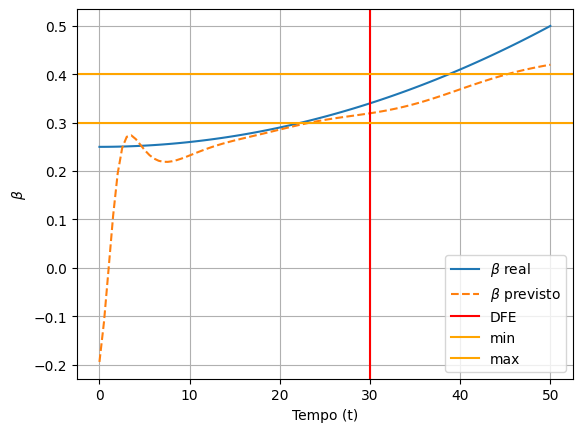

In [10]:
plotting.plot_beta_comparison(mono_beta, predictions[:,2], data_t, 
    vlines=[(30, "DFE", "red")], 
    hlines=[(0.3, "min", "orange"), (0.4, "max", "orange")])

In [11]:
eval_predictions(sir_comparts, predictions)

,compartiment,MSE,L2,L-infinity
0,S,0.000282,0.026447,0.024663
1,I,0.000002,0.006767,0.003639
2,beta,0.050863,0.533982,0.405408
